<h3> Extract Insight Profile features </h3>
Insight profiles were copied directly from a .js script on the insight data science page. It contains the name of each fellow, their university, their demo project name, and the company that hired them. 
This notebook uses regular expressions to extract those features into a useable format.  


In [1]:
import re
import pandas as pd
import seaborn as svs
%matplotlib inline


In [2]:
with open('insight_profiles') as f:
    ftxt = f.read()

In [3]:
def get_features(ind):
    '''
    ind: the string block containing containing the information for a single individual
    
    '''
    j_t = re.findall('font-weight:600;">(.*?)</div>', ind, re.DOTALL)
    if len(j_t) == 3:
        j_t = j_t[1].split(',')
    elif len(j_t) == 2:
        j_t = j_t[0].split(',')
    else:
        j_t = j_t[0].split(',')
    
    if len(j_t) == 2:
        job_title = j_t[0].strip()
        company = j_t[1]
    else:
        job_title = j_t[0].strip()
        company =  '?'
        
    project_title = re.findall('20px;">(.*?)</div>', ind, re.DOTALL)[0].strip()
    university =re.findall('<br>(.*?)<br>', ind, re.DOTALL)[0].strip()
    background =re.findall('6px;">(.*?)<br>', ind, re.DOTALL)[0].strip()
    out_dict = {'job_title': job_title,
                'company':company, 
                'project_title':project_title,
               'university':university,
               'background':background}
    
    return out_dict


In [ ]:
'''
Create a count of the number of fellows that were hired by each company\

'''

In [4]:


individuals =  re.findall ( '[*][*]/(.*?)/[*][*]', ftxt, re.DOTALL) 
company_set = set()
company_dict = {}
for ind in individuals:
    out_dict = get_features(ind)   
    b = re.sub('<br>', '', out_dict['company'])
    b = re.sub('</br>', '', b)
    b = re.sub('[&#39;]', '', b)
    out_dict['company'] = b.strip()
    com = out_dict['company']
    if com in company_set:
        
        company_dict[com] += 1
    else:
        company_set.add(com)
        company_dict[com] = 1
        


In [5]:
company_set
new_company_set = set()
for i in company_set:

    new_company_set.add(b)
print new_company_set

set([' Payoff'])


In [6]:
company_series = pd.Series(company_dict).to_frame()
company_series.to_excel('companies.xlsx', sheet_name='s')


In [7]:
plot_series = company_series.sort(columns = [0], ascending = False)
plot_series.loc['Insight Data Science'] = 10
plot_series = plot_series.drop(['Insight','?'])
plot_series = plot_series.sort(columns = [0], ascending = False)


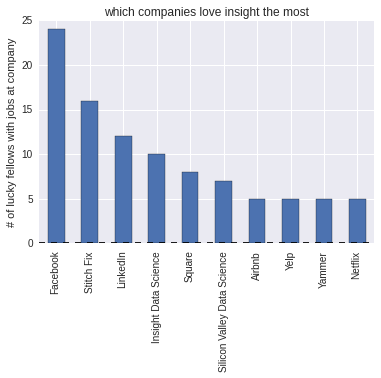

In [9]:
cur_plot = plot_series.plot(kind = 'bar')
cur_plot.set_xlim([-0.5, 9.5])
cur_plot.legend_.remove()
cur_plot.set_title('which companies love insight the most')
cur_plot.set_ylabel('# of lucky fellows with jobs at company')
fig = cur_plot.get_figure()
fig.patch.set_facecolor('white')